Pregnancy Marketing Exercise

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("fivethirtyeight")
from IPython.display import Image
from sklearn.cross_validation import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.datasets import make_classification;

/Users/cnohejl/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
df = pd.read_csv(os.path.join('dataset-13-walget-train.csv'))

In [3]:
df.head()

,AccountHolderImpliedGender,AccountHolderAddress,RecentlyPurchasedPregnancyTest,RecentlyPurchasedBirthControl,RecentlyPurchasedFeminineHygieneProducts,RecentlyPurchasedFolicAcidSupplements,RecentlyPurchasedPrenatalVitamins,RecentlyPurchasedPrenatalYogaDVD,RecentlyPurchasedBodyPillow,RecentlyPurchasedGingerAle,RecentlyPurchasedSeaBands,PurchasedCigarettesRegularlyUntilRecentlyThenStopped,RecentlyPurchasedCigarettes,RecentlyPurchasedSmokingCessationProducts,PurchasedWineRegularlyUntilRecentlyThenStopped,RecentlyPurchasedWine,RecentlyPurchasedMaternityClothing,IsPregnant
0,Female,Home,False,False,NaN,False,True,False,False,False,True,False,False,False,True,False,False,True
1,Female,PO Box,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
2,Male,Apartment,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,Male,Home,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,True
4,Female,PO Box,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [4]:
df.columns

Index([u'AccountHolderImpliedGender', u'AccountHolderAddress',
       u'RecentlyPurchasedPregnancyTest', u'RecentlyPurchasedBirthControl',
       u'RecentlyPurchasedFeminineHygieneProducts',
       u'RecentlyPurchasedFolicAcidSupplements',
       u'RecentlyPurchasedPrenatalVitamins',
       u'RecentlyPurchasedPrenatalYogaDVD', u'RecentlyPurchasedBodyPillow',
       u'RecentlyPurchasedGingerAle', u'RecentlyPurchasedSeaBands',
       u'PurchasedCigarettesRegularlyUntilRecentlyThenStopped',
       u'RecentlyPurchasedCigarettes',
       u'RecentlyPurchasedSmokingCessationProducts',
       u'PurchasedWineRegularlyUntilRecentlyThenStopped',
       u'RecentlyPurchasedWine', u'RecentlyPurchasedMaternityClothing',
       u'IsPregnant'],
      dtype='object')

Strategy:
- Classifier problem - therefore we are planning to use a logistic regression
    - Not planning to use correlation matrix given it is a classier problem
- Use ROC to understand accuracy
- Assume that men and women whom are having a baby would have different buying patterns
- Hypothesize that the following features will be the most relevant: pregnancy test, folic acid supplements, prenatal vitamens, and maternity clothing

Initial steps:
- First, I will focus on women as women and men may have very different buying patterns.  For example, a man may not buy maternity clothing.  
- Next I will remove all columns except pregnancy test, folic acid supplements, prenatal vitamens, and maternity clothing, and is pregnant.
- Then I will remove rows with null values.
- Then I will change the true and false values to 1 and 0 so we can do counts and summary stats.


In [5]:
df_women=df[df['AccountHolderImpliedGender'] == "Female"]
df_women

,AccountHolderImpliedGender,AccountHolderAddress,RecentlyPurchasedPregnancyTest,RecentlyPurchasedBirthControl,RecentlyPurchasedFeminineHygieneProducts,RecentlyPurchasedFolicAcidSupplements,RecentlyPurchasedPrenatalVitamins,RecentlyPurchasedPrenatalYogaDVD,RecentlyPurchasedBodyPillow,RecentlyPurchasedGingerAle,RecentlyPurchasedSeaBands,PurchasedCigarettesRegularlyUntilRecentlyThenStopped,RecentlyPurchasedCigarettes,RecentlyPurchasedSmokingCessationProducts,PurchasedWineRegularlyUntilRecentlyThenStopped,RecentlyPurchasedWine,RecentlyPurchasedMaternityClothing,IsPregnant
0,Female,Home,False,False,NaN,False,True,False,False,False,True,False,False,False,True,False,False,True
1,Female,PO Box,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
4,Female,PO Box,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,Female,Home,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False
8,Female,Apartment,True,False,False,True,True,False,False,True,False,True,False,False,False,False,False,True
9,Female,Apartment,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True
10,Female,Apartment,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False
15,Female,Apartment,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
16,Female,Home,False,False,False,False,NaN,False,False,False,False,False,False,False,False,False,False,False
17,Female,Home,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [6]:
df_women=df_women[['RecentlyPurchasedPregnancyTest','RecentlyPurchasedFolicAcidSupplements','RecentlyPurchasedPrenatalVitamins','RecentlyPurchasedMaternityClothing','IsPregnant']]

In [7]:
df_women

,RecentlyPurchasedPregnancyTest,RecentlyPurchasedFolicAcidSupplements,RecentlyPurchasedPrenatalVitamins,RecentlyPurchasedMaternityClothing,IsPregnant
0,False,False,True,False,True
1,False,False,False,False,True
4,False,False,False,False,False
5,False,False,False,False,False
8,True,True,True,False,True
9,False,False,False,False,True
10,False,False,False,False,False
15,False,False,False,False,True
16,False,False,NaN,False,False
17,False,False,False,False,False


In [8]:
df_women=df_women.dropna()

In [9]:
df_women

,RecentlyPurchasedPregnancyTest,RecentlyPurchasedFolicAcidSupplements,RecentlyPurchasedPrenatalVitamins,RecentlyPurchasedMaternityClothing,IsPregnant
0,False,False,True,False,True
1,False,False,False,False,True
4,False,False,False,False,False
5,False,False,False,False,False
8,True,True,True,False,True
9,False,False,False,False,True
10,False,False,False,False,False
15,False,False,False,False,True
17,False,False,False,False,False
19,False,False,False,False,False


In [10]:
df_women.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 296 entries, 0 to 596
Data columns (total 5 columns):
RecentlyPurchasedPregnancyTest           296 non-null object
RecentlyPurchasedFolicAcidSupplements    296 non-null object
RecentlyPurchasedPrenatalVitamins        296 non-null object
RecentlyPurchasedMaternityClothing       296 non-null object
IsPregnant                               296 non-null bool
dtypes: bool(1), object(4)
memory usage: 11.9+ KB


In [11]:
df_women=df_women*1
df_women

,RecentlyPurchasedPregnancyTest,RecentlyPurchasedFolicAcidSupplements,RecentlyPurchasedPrenatalVitamins,RecentlyPurchasedMaternityClothing,IsPregnant
0,0,0,1,0,1
1,0,0,0,0,1
4,0,0,0,0,0
5,0,0,0,0,0
8,1,1,1,0,1
9,0,0,0,0,1
10,0,0,0,0,0
15,0,0,0,0,1
17,0,0,0,0,0
19,0,0,0,0,0


Now it's time for some analysis

In [22]:
df_women.sum()

RecentlyPurchasedPregnancyTest            22.0
RecentlyPurchasedFolicAcidSupplements     32.0
RecentlyPurchasedPrenatalVitamins         44.0
RecentlyPurchasedMaternityClothing        45.0
IsPregnant                               164.0
dtype: float64

In [34]:
df_women

,RecentlyPurchasedPregnancyTest,RecentlyPurchasedFolicAcidSupplements,RecentlyPurchasedPrenatalVitamins,RecentlyPurchasedMaternityClothing,IsPregnant
0,0,0,1,0,1
1,0,0,0,0,1
4,0,0,0,0,0
5,0,0,0,0,0
8,1,1,1,0,1
9,0,0,0,0,1
10,0,0,0,0,0
15,0,0,0,0,1
17,0,0,0,0,0
19,0,0,0,0,0


In [38]:
df_women.groupby('IsPregnant').sum() / df_women.groupby('IsPregnant').count()

,RecentlyPurchasedPregnancyTest,RecentlyPurchasedFolicAcidSupplements,RecentlyPurchasedPrenatalVitamins,RecentlyPurchasedMaternityClothing
IsPregnant,,,,
0,0.007576,0.000000,0.030303,0.045455
1,0.128049,0.195122,0.243902,0.237805


Now creating Logistic Regression model on whole data set

In [50]:
#Create X and y variables
X = df_women.drop("IsPregnant", axis=1)
y = df_women.IsPregnant

#Intialize, fit, and score the model
lr = LogisticRegression()

lr.fit(X,y)

score = lr.score(X,y)

print ("The model produces an accuracy score of {:.2f} percent".format(score*100))

The model produces an accuracy score of 75.00 percent


In [51]:
y.value_counts(normalize=True)

1    0.554054
0    0.445946
Name: IsPregnant, dtype: float64

Our model is pretty good.

In [56]:
#Step 1. Use test_size = 0.4 and random_state = 42
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.4, random_state=42)

#Step 2
lr=LogisticRegression()
lr.fit(X_train, y_train)

#Step 3
pred=lr.predict(X_test) #use model from training data to make predictions on test data

#Step 4
testing_score = accuracy_score(y_test, pred)

print ("The model accurately classified {:.2f} percent of the testing data".format(testing_score*100))

The model accurately classified 81.51 percent of the testing data


In [75]:
confusion_matrix(y_test, pred)

array([[35, 22],
       [42, 20]])

This proves that it's better to use training and test data sets.  I used a test size of .2

In [57]:
cross_val_score(LogisticRegression(), X,y, cv=5, scoring='accuracy')

array([ 0.76666667,  0.83333333,  0.72881356,  0.72881356,  0.68965517])

In [54]:
cross_val_score(LogisticRegression(), X,y, cv=5, scoring='accuracy').mean()

0.74945645821157214

The cross validated model should be more accurate than one training and test set above.

Now, let's look at the accuracy of the model using ROC.

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.4,
                                                    random_state=4)

lr=LogisticRegression()
lr.fit(X_train,y_train)
preds = lr.predict(X_test)

In [67]:
y_test.value_counts(normalize=False)

1    62
0    57
Name: IsPregnant, dtype: int64

Create a confusion matrix:

In [77]:
#confusion_matrix(y_test, preds)
pd.crosstab(preds, y_test)

IsPregnant,0,1
row_0,,
0,54,25
1,3,37


In [84]:
print pd.crosstab(df_women.IsPregnant, [df.RecentlyPurchasedPregnancyTest])
print pd.crosstab(df_women.IsPregnant, [df.RecentlyPurchasedFolicAcidSupplements])
print pd.crosstab(df_women.IsPregnant, [df.RecentlyPurchasedPrenatalVitamins])
print pd.crosstab(df_women.IsPregnant, [df.RecentlyPurchasedMaternityClothing])

RecentlyPurchasedPregnancyTest  False  True 
IsPregnant                                  
0.0                               131      1
1.0                               143     21
RecentlyPurchasedFolicAcidSupplements  False  True 
IsPregnant                                         
0.0                                      132      0
1.0                                      132     32
RecentlyPurchasedPrenatalVitamins  False  True 
IsPregnant                                     
0.0                                  128      4
1.0                                  124     40
RecentlyPurchasedMaternityClothing  False  True 
IsPregnant                                      
0.0                                   126      6
1.0                                   125     39


Crosstabshows that we are accurately predicting the pregnant women(only missed 3 of 57), but inaccurately predicted that 25 of 62 pregnant women were not pregnant. This approach is clearer than the confusion matrix b/c it is labeled.

In [78]:
acs = float(accuracy_score(y_test,preds))
ps = float(precision_score(y_test,preds))
rs = float(recall_score(y_test,preds))

print ("Accuracy score = {:.2f}".format(acs*100))
print ("Precision score = {:.2f}".format(ps*100))
print ("Recall score = {:.2f}".format(rs*100))

Accuracy score = 76.47
Precision score = 92.50
Recall score = 59.68


Now let's look at false positive score

In [79]:
def FPR(YT, PR): 
    """
    YT is the target variable for the testing set
    PR is the predictions made on the features of the testing set
    """
    CM = confusion_matrix(YT, PR)
    TN = CM[0,0]
    FP=CM[0,1]
    FPR=FP/(float(FP+TN))
    return FPR

In [80]:
FPR(y_test, preds)

0.052631578947368418

In [81]:
#Derive probabilities of class 1 from the test set
test_probs = lr.predict_proba(X_test)[:,1]
#Pass in the test_probs variable and the true test labels aka y_test in the roc_curve function
fpr, tpr, thres = roc_curve(y_test, test_probs)
#Will explain the fpr, tpr, thresholds

Plot ROC curve

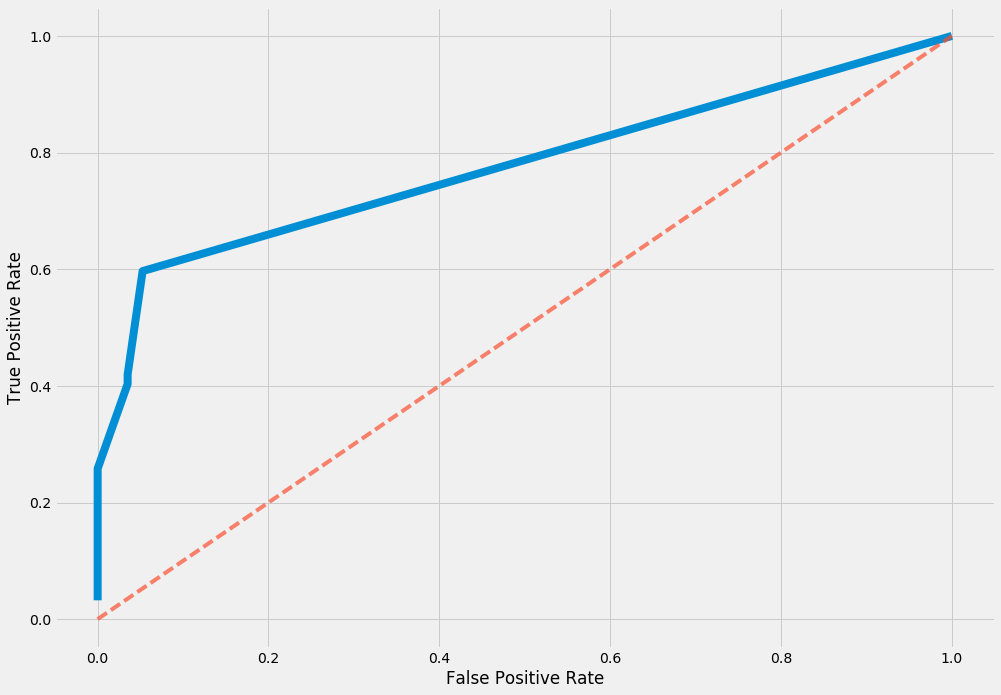

In [82]:
plt.figure(figsize=(15,11))
plt.plot(fpr, tpr, linewidth=8)
plt.plot([0,1], [0,1], "--", alpha=.7)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

plt.show()

In [83]:
roc_auc_score(y_test, test_probs)

0.7768817204301075

Note: The threshold is the cut off value for the probability - e.g. it may not be .5.  Intersection of yellow and green lines in the plot from the logistic regression lesson last week.

Summary:
- Model is 75% accurate based on the cross validation score.
- The crosstab function shows that I correctly identified women whom were pregnant 37/62=60% of the time which is not great - I am missing the opportunity to market to more pregnant women.  I was much better at predicting whom was not pregnant 54/57= 95% correct, which means I'm not wasting much money marketing to non-pregnant women.
- The ROC looks pretty good as it slopes up relatively high on the left.